# Introduction to Text Preprocessing for Machine Learning

This tutorial will guide you through text preprocessing using NLTK, constructing a boolean representation for text and performing a boolean search as shown in the IR part of this course.
These instructions assume that you have Python and the corresponding necessary package installed.
If this is not the case, go back to the [installation instructions](https://wattlecourses.anu.edu.au/pluginfile.php/1412128/mod_resource/content/8/installation-and-usage-instructions.html).

## Setup and Compilation

Download the [tutorial starting code from Wattle](https://wattlecourses.anu.edu.au/mod/resource/view.php?id=1198771) (~12MB), save it in a local folder and unzip it. 
**Warning:** This operation might take a couple of minutes, considering the number of files in the archive.
The `source` folder contains Python code file and the tutorial notebooks.
Navigate to this folder and start the jupyter notebook.

If you have problems: use Google, ask a classmate who attended the lab for help or ask the tutor (in this order).

## 1. Dataset loading

Start by loading the required libraries and making `jupyter notebook` configurations.

In [1]:
## some configurations for notebook and importing modules
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this tutorial we use a subset of the [newsgroup dataset](https://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html), entitled `two_newsgroup`, which has two  categories: `comp.graphics` and `sci.med`.

We load the dataset into a [pandas Dataframe](https://pandas.pydata.org), which is a two-dimensional labeled data-structure (like a table).
Columns represent attributes and rows represent data instances. 
In the `two_newsgroup` dataset, columns represent document id, category and text for each document (*i.e.* each row).

The code for reading the dataset is provided in the python source file `data.py` (which the next block loads).

In [2]:
from data import read_as_df
## TODO start
## specify the path to the dataset two_newsgroup
path_to_dataset = '../data/two_newsgroups/'
## TODO stop
dataset = read_as_df(path_to_dataset)
print("Number of rows and columns of the dataset: {}".format(dataset.shape))
print("The first five documents:")
dataset.head()

Number of rows and columns of the dataset: (1963, 3)
The first five documents:


,id,category,text
0,59263,sci.med,From: ttrusk@its.mcw.edu (Thomas Trusk)\nSubje...
1,59051,sci.med,From: nyeda@cnsvax.uwec.edu (David Nye)\nSubje...
2,59435,sci.med,"From: ""nigel allen"" <nigel.allen@canrem.com>\n..."
3,59297,sci.med,From: jtpoupor@undergrad.math.uwaterloo.ca (Je...
4,59638,sci.med,Subject: Re: cure for dry skin?\nFrom: habersc...


## 2. Textual preprocessing

As shown above, we have 1963 documents in our dataset. 
We extract and print the first document, which will be used throughout this section for introducing different text preprocessing techniques.

In [3]:
document = dataset['text'][0]
print(document)

From: ttrusk@its.mcw.edu (Thomas Trusk)
Subject: Re: Krillean Photography
Organization: Medical College of Wisconsin
Lines: 22
Reply-To: ttrusk@its.mcw.edu
NNTP-Posting-Host: pixel.cellbio.mcw.edu


In article <20APR199315574161@vxcrna.cern.ch> filipe@vxcrna.cern.ch (VINCI) writes:

> How about Kirlian imaging ? I believe the FAQ for sci.skeptics (sp?)
> has a nice write-up on this. They would certainly be most supportive
> on helping you to build such a device and connect to a 120Kvolt
> supply so that you can take a serious look at your "aura"... :-)
>
> Filipe Santos
> CERN - European Laboratory for Particle Physics
> Switzerland

Please sign the relevant documents and forward the remaining parts
to our study 'Effect of 120 Kv on Human Tissue wrapped in Film'.
Thanks for your support...
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*==*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*Dr. Thomas Trusk                    *                              *
*Dept. of Cellular Biology & Anatomy * Email to ttrusk@its.

Most Machine Learning algorithms require the data to be represented as vectors, *i.e.* as array of numbers.
We need to convert our document into a numeric vector. 
Before proceeding, we perform textual preprocessing and we convert the docuemnt to list of tokens. 
Some of the common preprocessing steps are:
1. Tokenization 
2. Stop words removal
3. Stemming

We will cover these concepts one by one.

### 2.1 Tokenization

Tokenization divides a document into a sequence of tokens. Tokens are the basic unit of a document, *e.g.* words. 
The [NLTK](http://www.nltk.org) library provides different functionalities for text processing and natural language processing including tokenization, stemming and stop word removal. 

The following block defines a NLTK tokenizer based on a regex pattern which preserves abbreviations, words with hyphens, currencies and percentages, ellipsis (such as ...), *etc* when breaking a documents into a list of tokens.

In [4]:
import nltk 
__tokenization_pattern = r'''(?x)          # set flag to allow verbose regexps
        \$?\d+(?:\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
      | (?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
      | \w+(?:-\w+)*        # words with optional internal hyphens
      | \.\.\.              # ellipsis
      | [][.,;"'?():_`-]    # these are separate tokens; includes ], [
    '''

## call it using tokenizer.tokenize
tokenizer = nltk.tokenize.regexp.RegexpTokenizer(__tokenization_pattern)

Let us construct the corresponding list of tokens for an example phrase:

In [5]:
tokens = tokenizer.tokenize("""
The economy of Australia is a developed, with a G.D.P. of AUD$1.67 trillion as of 2016 and a growth rate of 2.80%.

""")
print(tokens)

['The', 'economy', 'of', 'Australia', 'is', 'a', 'developed', ',', 'with', 'a', 'G.D.P.', 'of', 'AUD', '$1.67', 'trillion', 'as', 'of', '2016', 'and', 'a', 'growth', 'rate', 'of', '2.80%', '.']


Now, let's use the tokenizer we just defined to tokenize our target document and obtain the corresponding list of tokens.
Note that we are also converting the document to lowercase.

In [7]:
tokens = tokenizer.tokenize(document.lower())
print("number of tokens : {}".format(len(set(tokens))))
print("tokens: {}".format(tokens))

number of tokens : 130
tokens: ['from', ':', 'ttrusk', 'its', '.', 'mcw', '.', 'edu', '(', 'thomas', 'trusk', ')', 'subject', ':', 're', ':', 'krillean', 'photography', 'organization', ':', 'medical', 'college', 'of', 'wisconsin', 'lines', ':', '22', 'reply-to', ':', 'ttrusk', 'its', '.', 'mcw', '.', 'edu', 'nntp-posting-host', ':', 'pixel', '.', 'cellbio', '.', 'mcw', '.', 'edu', 'in', 'article', '20', 'apr199315574161', 'vxcrna', '.', 'cern', '.', 'ch', 'filipe', 'vxcrna', '.', 'cern', '.', 'ch', '(', 'vinci', ')', 'writes', ':', 'how', 'about', 'kirlian', 'imaging', '?', 'i', 'believe', 'the', 'faq', 'for', 'sci', '.', 'skeptics', '(', 'sp', '?', ')', 'has', 'a', 'nice', 'write-up', 'on', 'this', '.', 'they', 'would', 'certainly', 'be', 'most', 'supportive', 'on', 'helping', 'you', 'to', 'build', 'such', 'a', 'device', 'and', 'connect', 'to', 'a', '120', 'kvolt', 'supply', 'so', 'that', 'you', 'can', 'take', 'a', 'serious', 'look', 'at', 'your', '"', 'aura', '"', '...', ':', '-', ')

Now, we will filter out the non alphabetic tokens using the standard Python function [isalpha()](https://docs.python.org/2/library/stdtypes.html).

In [8]:
## filter out non alphabets
alphabet_tokens = [token for token in tokens if token.isalpha()]
print("number of tokens : {}".format(len(set(alphabet_tokens))))
print("tokens: {}".format(alphabet_tokens))

number of tokens : 109
tokens: ['from', 'ttrusk', 'its', 'mcw', 'edu', 'thomas', 'trusk', 'subject', 're', 'krillean', 'photography', 'organization', 'medical', 'college', 'of', 'wisconsin', 'lines', 'ttrusk', 'its', 'mcw', 'edu', 'pixel', 'cellbio', 'mcw', 'edu', 'in', 'article', 'vxcrna', 'cern', 'ch', 'filipe', 'vxcrna', 'cern', 'ch', 'vinci', 'writes', 'how', 'about', 'kirlian', 'imaging', 'i', 'believe', 'the', 'faq', 'for', 'sci', 'skeptics', 'sp', 'has', 'a', 'nice', 'on', 'this', 'they', 'would', 'certainly', 'be', 'most', 'supportive', 'on', 'helping', 'you', 'to', 'build', 'such', 'a', 'device', 'and', 'connect', 'to', 'a', 'kvolt', 'supply', 'so', 'that', 'you', 'can', 'take', 'a', 'serious', 'look', 'at', 'your', 'aura', 'filipe', 'santos', 'cern', 'european', 'laboratory', 'for', 'particle', 'physics', 'switzerland', 'please', 'sign', 'the', 'relevant', 'documents', 'and', 'forward', 'the', 'remaining', 'parts', 'to', 'our', 'study', 'effect', 'of', 'kv', 'on', 'human', 't

### 2.2 Stopwords removal
Stopwords are commonly used words that do not provide any document specific information, such as **the**, **from**, **to**, **at** *etc*.
We use the NLTK standard stopwords list to remove stopwords from our list of tokens.

In [9]:
from nltk.corpus import stopwords
en_stopwords = set(stopwords.words('english'))
non_stopwords = [word for word in alphabet_tokens if not word in en_stopwords]
print("number of tokens : {}".format(len(set(non_stopwords))))
print("tokens: {}".format(non_stopwords))

number of tokens : 80
tokens: ['ttrusk', 'mcw', 'edu', 'thomas', 'trusk', 'subject', 'krillean', 'photography', 'organization', 'medical', 'college', 'wisconsin', 'lines', 'ttrusk', 'mcw', 'edu', 'pixel', 'cellbio', 'mcw', 'edu', 'article', 'vxcrna', 'cern', 'ch', 'filipe', 'vxcrna', 'cern', 'ch', 'vinci', 'writes', 'kirlian', 'imaging', 'believe', 'faq', 'sci', 'skeptics', 'sp', 'nice', 'would', 'certainly', 'supportive', 'helping', 'build', 'device', 'connect', 'kvolt', 'supply', 'take', 'serious', 'look', 'aura', 'filipe', 'santos', 'cern', 'european', 'laboratory', 'particle', 'physics', 'switzerland', 'please', 'sign', 'relevant', 'documents', 'forward', 'remaining', 'parts', 'study', 'effect', 'kv', 'human', 'tissue', 'wrapped', 'film', 'thanks', 'support', 'dr', 'thomas', 'trusk', 'dept', 'cellular', 'biology', 'anatomy', 'email', 'ttrusk', 'mcw', 'edu', 'medical', 'college', 'wisconsin', 'milwaukee', 'wi', 'disclaimer', 'ala', 'foghorn', 'leghorn', 'joke', 'son', 'joke', 'say']

### 2.3 Stemming
[Stemming](https://en.wikipedia.org/wiki/Stemming) is the process of reducing inflected words to their word stem, base or root form. 
The NLTK python library also contains an implementation of the [Snowball stemming](http://snowballstem.org) algorithm.

In [10]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

stems = [str(stemmer.stem(word)) for word in non_stopwords]
print("number of tokens : {}".format(len(set(stems))))
print("tokens: {}".format(stems))

number of tokens : 79
tokens: ['ttrusk', 'mcw', 'edu', 'thoma', 'trusk', 'subject', 'krillean', 'photographi', 'organ', 'medic', 'colleg', 'wisconsin', 'line', 'ttrusk', 'mcw', 'edu', 'pixel', 'cellbio', 'mcw', 'edu', 'articl', 'vxcrna', 'cern', 'ch', 'filip', 'vxcrna', 'cern', 'ch', 'vinci', 'write', 'kirlian', 'imag', 'believ', 'faq', 'sci', 'skeptic', 'sp', 'nice', 'would', 'certain', 'support', 'help', 'build', 'devic', 'connect', 'kvolt', 'suppli', 'take', 'serious', 'look', 'aura', 'filip', 'santo', 'cern', 'european', 'laboratori', 'particl', 'physic', 'switzerland', 'pleas', 'sign', 'relev', 'document', 'forward', 'remain', 'part', 'studi', 'effect', 'kv', 'human', 'tissu', 'wrap', 'film', 'thank', 'support', 'dr', 'thoma', 'trusk', 'dept', 'cellular', 'biolog', 'anatomi', 'email', 'ttrusk', 'mcw', 'edu', 'medic', 'colleg', 'wisconsin', 'milwauke', 'wi', 'disclaim', 'ala', 'foghorn', 'leghorn', 'joke', 'son', 'joke', 'say']


Notice that the number of unique tokens decreases with each of the preprocessing steps. Why did this happen?

## Implementation task
Your current task is to **build the a preprocessing function** which takes an entire document and performs all of the above preprocessing steps (*i.e.* converting to lowercase, tokenization, removing stopwords and stemming) in a single function. 

In [11]:
def preprocessor(text):
    '''
        turns text into tokens after tokenization, stemming, stop words removal
        imput:
            - text: document to process
        output: =>
            - tokens: list of tokens after tokenization, stemming, stop words removal
    '''
    stems = []
    
    ## TODO: fill each of the steps below
    ## Step 1: tokenization
    ## Step 2: remove non-alphabetic characters
    ## Step 3: remove stopwords
    ## Step 4: stemm tokens

    ## TODO end
    
    return stems

We will use your newly implmented function to create a column of `tokens` in our dataframe. 
The method [`DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) takes a function and applies it to each row of the dataframe. 

**note**: the next block might a bit to execute depending on the efficiency of your implementation and on the performances of your system.

In [12]:
dataset['tokens'] = dataset['text'].apply(preprocessor)
dataset.head()

,id,category,text,tokens
0,59263,sci.med,From: ttrusk@its.mcw.edu (Thomas Trusk)\nSubje...,[]
1,59051,sci.med,From: nyeda@cnsvax.uwec.edu (David Nye)\nSubje...,[]
2,59435,sci.med,"From: ""nigel allen"" <nigel.allen@canrem.com>\n...",[]
3,59297,sci.med,From: jtpoupor@undergrad.math.uwaterloo.ca (Je...,[]
4,59638,sci.med,Subject: Re: cure for dry skin?\nFrom: habersc...,[]


## 3. Statistics over textual tokens
We compute the histogram of tokens across the entire dataset and we search for the 10 most frequent tokens with their counts.
We also produce the plot of the frequency of the most common 50 tokens (the X axis presents tokens, ordered by their frequency).

You can change 50 to a higher value to have even more tokens plotted.
What do you observe about the obtained distribution of token frequency? Does it look like a **rich-get-richer** effect?
What does this mean in the context of textual processing?
What other quantities present such a distribution (think about the distribution of heights vs. the distribution of income in a population of humans)?

Notice the python function [itertools.chain](https://docs.python.org/2/library/itertools.html#itertools.chain), of which you can think as a function that concatenates a list of lists into a single list.

[]


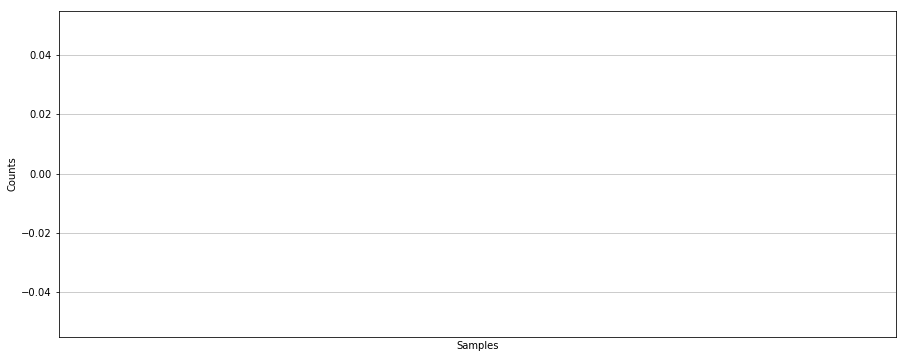

In [13]:
from itertools import chain
fdist = nltk.FreqDist(chain(*dataset['tokens']))
print(fdist.most_common(10))

plt.figure(figsize=(15, 6))  # the size you want
fdist.plot(50,cumulative=False)

How many unique tokens do we have in the dataset?

In [14]:
## total number of unique tokens in the collection
all_tokens = set(chain(*dataset['tokens']))
print("number of tokens in the dataset: {}".format(len(all_tokens)))

number of tokens in the dataset: 0


## 4. Boolean representation and search
### 4.1 Boolean representation
The sparse boolean representation represents a document as a set of words. 
Therefore, we create a new column in our dataset to represent each document as **a set** of tokens (as opposed to **a vector** of tokens in the previous column).
One of the advantages of the set representation is that it allows accesing efficient python methods for searching is a token exists in a set.

In [15]:
dataset['features'] = dataset['tokens'].apply(set)
dataset.head()

,id,category,text,tokens,features
0,59263,sci.med,From: ttrusk@its.mcw.edu (Thomas Trusk)\nSubje...,[],{}
1,59051,sci.med,From: nyeda@cnsvax.uwec.edu (David Nye)\nSubje...,[],{}
2,59435,sci.med,"From: ""nigel allen"" <nigel.allen@canrem.com>\n...",[],{}
3,59297,sci.med,From: jtpoupor@undergrad.math.uwaterloo.ca (Je...,[],{}
4,59638,sci.med,Subject: Re: cure for dry skin?\nFrom: habersc...,[],{}


### 4.2 Boolean Search

We implement a simple boolean search through the document collection. 
The boolean search was presented in the IR lectures (refresh your memory using the [link to the corresponding IR lecture slides](https://wattlecourses.anu.edu.au/pluginfile.php/1481743/mod_resource/content/0/lecture1_intro_to_br.pdf#page=13) ).

Let's start with searching for documents which contain the words `research` or `seminar`.

To do this, we create in the following block a predicate function that returns true if the document `doc` contains `research` or `seminar` in it.

In [16]:
def predicate(doc): 
    return stemmer.stem('research') in doc or stemmer.stem('seminar') in doc

## an array of true or false indicating match or ot match at corresponnding index
matches = dataset['features'].apply(predicate)
print('num_matches = {}'.format(dataset[matches].size))
dataset[matches].head()

num_matches = 0


,id,category,text,tokens,features


**Note** that we stem each term in the query in the predicate. Why did we do this?

## Implementation task
Now search for documents containing `silicon` and `valley`. What should the predicate function be? 

In [17]:
def predicate(doc): 
    ## TODO: implement the predicate function
    
    ## TODO stop

matches = dataset['features'].apply(predicate)
print('num_matches = {}'.format(dataset[matches].size))
dataset[matches].head()

IndentationError: expected an indented block (<ipython-input-17-4e6cda05ff65>, line 6)